# Subtask 1:  Implement parallel computation of bifurcation map 
see <i>parallel_bifurcation.py</i>

# Subtask 2: Plot speedup vs number of processes

In [34]:
%%writefile parallel_bifurcation.py

import numpy as np
from mpi4py import MPI
import time

def formula(r, x):
    return r * x * (1 - x)

time_start = time.time()

comm = MPI.COMM_WORLD

size = comm.Get_size()
rank = comm.Get_rank()

# Parameters of calculation
number_of_steps = 700
last = 200
length = 1000

r = np.linspace(0.8, 4, length)
x0 = np.random.sample() * np.ones(length)
index = np.linspace(0, length, size + 1, dtype = int)

x = []
# Ranging calculations between processes
r_rank = r[index[rank]:index[rank + 1]]
x_rank = x0[index[rank]:index[rank + 1]]

# Calculation in every process
for i in range(number_of_steps):
    x_rank = formula(r_rank, x_rank)
    x.append(x_rank)
    
x_result = x[number_of_steps - last:number_of_steps]

data = comm.gather([x_result, r_rank], root = 0)

if rank == 0:
    work_time = time.time() - time_start
    print(work_time)

Overwriting parallel_bifurcation.py


## Parallel computation call and Calculation of speedup

#### Parallel speedup is defined as the ratio of the time required to compute some function using a single processor (T1) divided by the time required to compute it using P processors (TP): Speedup = T1/TP

In [31]:
import numpy as np

process = np.arange(1, 16)
calculation_time = []

for i in process:
    
    time = !mpiexec -np {i} python parallel_bifurcation.py
    calculation_time.append(float(time[0]))
    print(float(time[0]))
    
speedup = []
    
for i in calculation_time:
    speedup.append(calculation_time[0] / i)

0.007926225662231445
0.007002830505371094
0.008001089096069336
0.009009361267089844
0.010858297348022461
0.011373043060302734
0.017003297805786133
0.01410365104675293
0.020470380783081055
0.059247493743896484
0.05673933029174805
0.05865740776062012
0.06655526161193848
0.06192469596862793
0.07805657386779785


## Plot of speedup vs number of processes

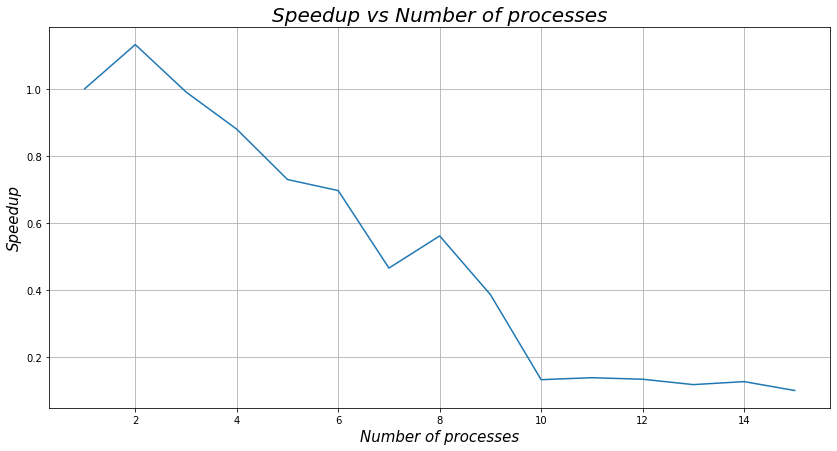

In [32]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 1, figsize = (14, 7))

ax.plot(process, speedup)
ax.set_title('Speedup vs Number of processes', fontsize = 20, fontstyle = 'oblique')

plt.xlabel('Number of processes', fontsize = 15, fontstyle = 'oblique')
plt.ylabel('Speedup', fontsize = 15, fontstyle = 'oblique')

plt.grid(True)

plt.show()